# Spotify Historyviewer

I have collected a lot of data since late 2021 about my spotify listening habits. Here you can find visualizations and calculations that I did with the collected data (in csv form; for more information how I got the data see [spotify-historymaker](https://github.com/leats/spotify-historymaker)).
It's all just a work in progress. I would enjoy to do more with it!

## Preparing the data

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# The first parts here will just be loading the data and reformatting it!

In [2]:
# Getting Artists


def clean_genres(genrelist: str):
    if type(genrelist) == str and len(genrelist) >= 3:
        genrelist = genrelist.strip("][").replace('"', "")
        return genrelist.split(",")
    else:
        return []


artist = pd.read_csv("artist.csv")
artist["genre"] = artist["genre"].apply(clean_genres)

print(artist.head(3))

                                     uri                 name  \
0  spotify:artist:49WCE2KzOvQu0wHsRcwaah         Rik Schaffer   
1  spotify:artist:20JZFwl6HVl6yg8a4H3ZqK  Panic! At The Disco   
2  spotify:artist:7EQ0qTo7fWT7DPxmxtSYEc             Bastille   

                                        genre                artistid  
0                                          []  49WCE2KzOvQu0wHsRcwaah  
1                               [modern rock]  20JZFwl6HVl6yg8a4H3ZqK  
2  [metropopolis, modern rock, pop, pop rock]  7EQ0qTo7fWT7DPxmxtSYEc  


In [3]:
# Gettin Album

album = pd.read_csv("album.csv")

print(album.head(3))

                                    uri  \
0  spotify:album:0FDGU2gZeZBoAHZa4X9IMc   
1  spotify:album:2YeOhhJg3OWpN0F1VYPxtW   
2  spotify:album:4SFB6GvNUyJ2V0z2BBfGgK   

                               artisturi                      id  \
0  spotify:artist:49WCE2KzOvQu0wHsRcwaah  0FDGU2gZeZBoAHZa4X9IMc   
1  spotify:artist:20JZFwl6HVl6yg8a4H3ZqK  2YeOhhJg3OWpN0F1VYPxtW   
2  spotify:artist:03Tk5nZMEoqaWZOXoiN7Km  4SFB6GvNUyJ2V0z2BBfGgK   

                                               title  
0  Vampire: The Masquerade - Bloodlines (More Mus...  
1                        A Fever You Can't Sweat Out  
2                              Ghibli, Anime & Chill  


In [4]:
# Gettin Track

track = pd.read_csv("track.csv")

print(track.head(3))

   popularity                              albumuri  \
0          14  spotify:album:0FDGU2gZeZBoAHZa4X9IMc   
1          76  spotify:album:2YeOhhJg3OWpN0F1VYPxtW   
2          60  spotify:album:4SFB6GvNUyJ2V0z2BBfGgK   

                                    uri  \
0  spotify:track:1VBO7TEeKYXAuFn1So5GqD   
1  spotify:track:4bPQs0PHn4xbipzdPfn6du   
2  spotify:track:6VcyHKX0tZvwFYtgJL7IcX   

                               artisturi                      id  duration  \
0  spotify:artist:49WCE2KzOvQu0wHsRcwaah  1VBO7TEeKYXAuFn1So5GqD    436460   
1  spotify:artist:20JZFwl6HVl6yg8a4H3ZqK  4bPQs0PHn4xbipzdPfn6du    186634   
2  spotify:artist:03Tk5nZMEoqaWZOXoiN7Km  6VcyHKX0tZvwFYtgJL7IcX     91725   

   explicit  tracknumber                                    title  
0     False           16                        World of Darkness  
1     False           10               I Write Sins Not Tragedies  
2     False            1  The Girl Who Fell From The Sky (Laputa)  


In [5]:
# Getting Played Info

played = pd.read_csv("played.csv")
played["time"] = played["time"].apply(lambda x: pd.to_datetime(x).tz_convert(None))
played = played.sort_values(by=["time"])
played = played.reset_index()

print(played.head(3))

   index                    time                              trackuri  \
0      1 2022-06-01 11:06:33.945  spotify:track:4bPQs0PHn4xbipzdPfn6du   
1      0 2022-06-01 14:34:02.838  spotify:track:1VBO7TEeKYXAuFn1So5GqD   
2      2 2022-06-02 12:11:54.030  spotify:track:6VcyHKX0tZvwFYtgJL7IcX   

                               artisturi  contexturi  
0  spotify:artist:20JZFwl6HVl6yg8a4H3ZqK         NaN  
1  spotify:artist:49WCE2KzOvQu0wHsRcwaah         NaN  
2  spotify:artist:03Tk5nZMEoqaWZOXoiN7Km         NaN  


In [6]:
# Since I want a definitive genre for every artist for visualizations, I will first find out which
# genres are the most common ones and only use those
from collections import Counter

genres = Counter()

for g in artist["genre"]:
    genres.update(g)


def select_most_common_genre(genrelist):
    if not len(genrelist):
        return None
    genre_with_counter = {}
    for genre in genrelist:
        genre_with_counter[genre] = genres[genre]
    final_genre = sorted(genre_with_counter.items(), key=lambda item: item[1])[-1][0]
    return final_genre


artist_one_genre = artist.copy()
artist_one_genre["genre"] = artist["genre"].apply(select_most_common_genre)
print(artist_one_genre.head(3))

                                     uri                 name        genre  \
0  spotify:artist:49WCE2KzOvQu0wHsRcwaah         Rik Schaffer         None   
1  spotify:artist:20JZFwl6HVl6yg8a4H3ZqK  Panic! At The Disco  modern rock   
2  spotify:artist:7EQ0qTo7fWT7DPxmxtSYEc             Bastille  modern rock   

                 artistid  
0  49WCE2KzOvQu0wHsRcwaah  
1  20JZFwl6HVl6yg8a4H3ZqK  
2  7EQ0qTo7fWT7DPxmxtSYEc  


In [7]:
# Since I want more information in the played dataframe, I'll add both genre and artist name, as well as album name and track name
# then everything I want to achieve can be done with only one dataframe


def get_df_column(uri: str, df: pd.DataFrame, column: str):
    art = df.loc[df["uri"] == uri]
    if not len(art):
        print(art)
        return None
    return art[column].item()


played["genre"] = played["artisturi"].apply(
    get_df_column, args=(artist_one_genre, "genre")
)
played["artist"] = played["artisturi"].apply(
    get_df_column, args=(artist_one_genre, "name")
)
played["albumuri"] = played["trackuri"].apply(get_df_column, args=(track, "albumuri"))
played["album"] = played["albumuri"].apply(get_df_column, args=(album, "title"))
played["title"] = played["trackuri"].apply(get_df_column, args=(track, "title"))
played["duration"] = played["trackuri"].apply(get_df_column, args=(track, "duration"))

# these aren't needed anymore for visualization
played = played.drop(["contexturi", "albumuri"], axis=1)

print(played.head(3))

   index                    time                              trackuri  \
0      1 2022-06-01 11:06:33.945  spotify:track:4bPQs0PHn4xbipzdPfn6du   
1      0 2022-06-01 14:34:02.838  spotify:track:1VBO7TEeKYXAuFn1So5GqD   
2      2 2022-06-02 12:11:54.030  spotify:track:6VcyHKX0tZvwFYtgJL7IcX   

                               artisturi        genre               artist  \
0  spotify:artist:20JZFwl6HVl6yg8a4H3ZqK  modern rock  Panic! At The Disco   
1  spotify:artist:49WCE2KzOvQu0wHsRcwaah         None         Rik Schaffer   
2  spotify:artist:03Tk5nZMEoqaWZOXoiN7Km         None           Sleepy Tom   

                                               album  \
0                        A Fever You Can't Sweat Out   
1  Vampire: The Masquerade - Bloodlines (More Mus...   
2                              Ghibli, Anime & Chill   

                                     title  duration  
0               I Write Sins Not Tragedies    186634  
1                        World of Darkness    436460  


In [8]:
# the duration is that of the song, however sometimes songs get skipped!
# this is where we can check whether the song following was played before the previous song ended naturally!
# if it was skipped we can just use the shorter duration for more accuracy
for index in range(len(played) - 1):
    row = played.iloc[index]
    this_time = row["time"]
    duration = row["duration"]
    next_time = played.iloc[index + 1]["time"]
    if this_time + datetime.timedelta(milliseconds=int(duration)) > next_time:
        new_duration = int((next_time - this_time).total_seconds() * 1000)
        played.loc[index, "duration"] = new_duration

The previous code prepares the actual data. In the following we can do stuff with the data!! :)

##  Visualizations

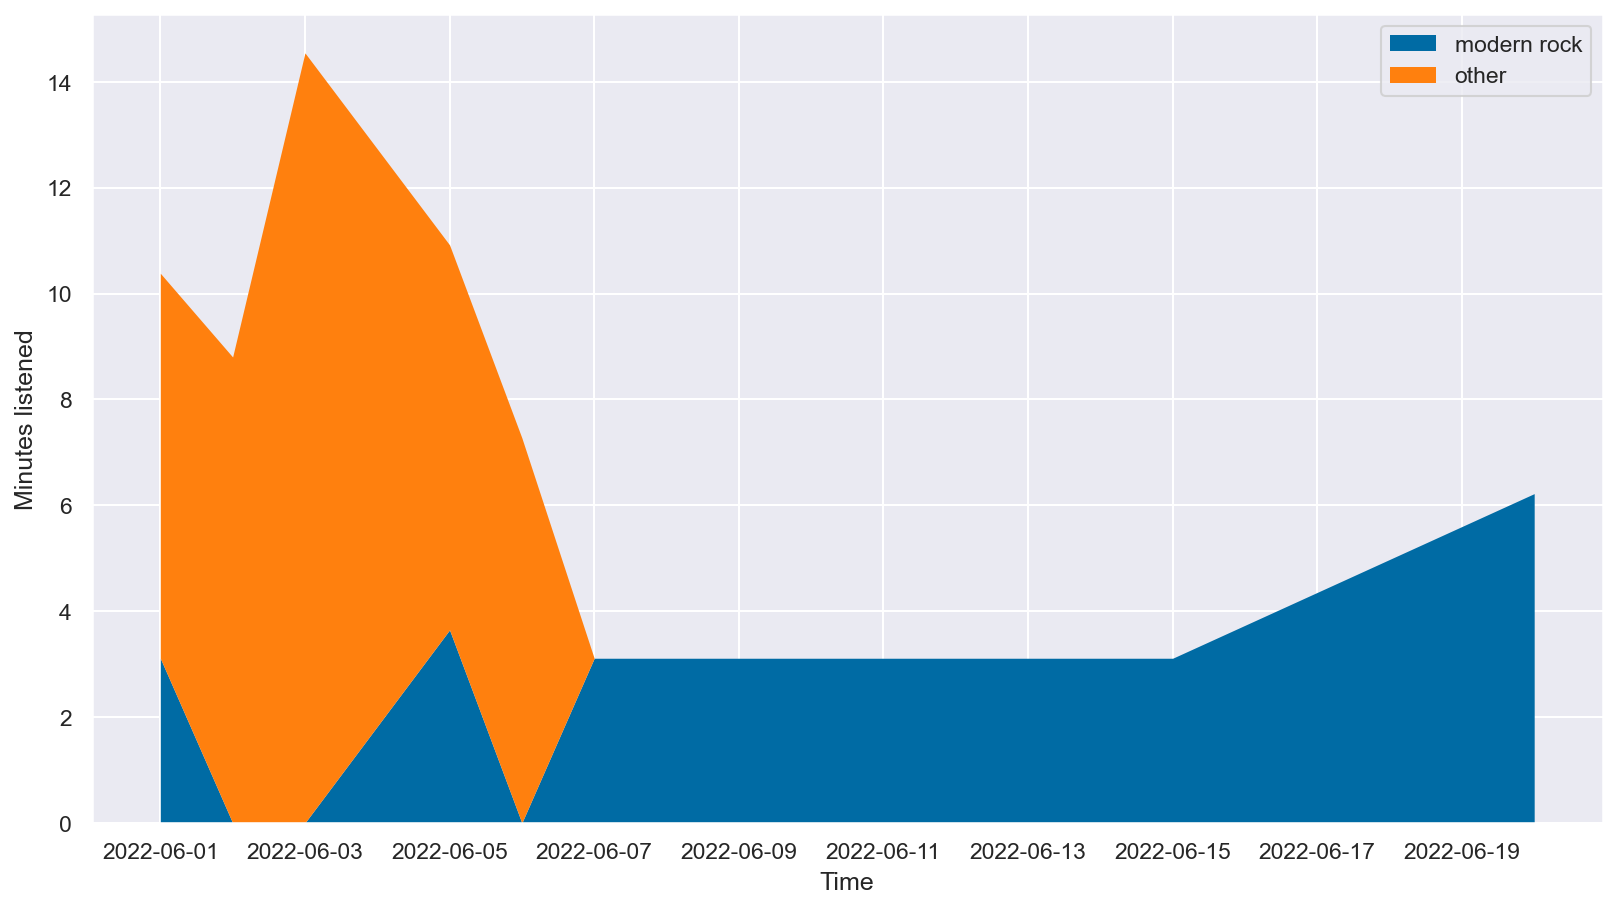

In [9]:
# A visualization that shows the time listened split up by genre
freq = "D"  # Split size! For week, use 'W', for month 'M', day 'D'
begin = "2022-06-01"  # Earliest date to be considered
end = "2022-06-30"  # Latest date to be considered
max_genres = 8
custom_genre = (
    None  # ["soundtrack", "pop", "rock", "metal", "video game music", "jazz"]
)

sns.set_theme()

played_time_genre = played[["time", "genre", "duration"]].copy()
# filter for only the timeframe
played_time_genre = played_time_genre[
    (played_time_genre["time"] >= pd.to_datetime(begin))
    & (played_time_genre["time"] <= pd.to_datetime(end))
]


# get only the most common genres for the time span
most_common_genres = played_time_genre["genre"].value_counts()[:max_genres].index
played_time_genre["genre"] = played_time_genre["genre"].apply(
    lambda x: x if x in most_common_genres else "other"
)

# duration is in minutes instead of milliseconds
played_time_genre["duration"] = played_time_genre["duration"] / 60000

grouped_played_time_genre = (
    played_time_genre.set_index("time")
    .groupby([pd.Grouper(freq=freq), "genre"])
    .sum()
    .unstack()
    .reset_index()
    .fillna(0)
)

# create the stackplot
plt.style.use("tableau-colorblind10")
plt.figure(figsize=(13, 7), dpi=150)
plt.stackplot(
    grouped_played_time_genre["time"],
    [grouped_played_time_genre[col] for col in grouped_played_time_genre.columns[1:]],
    labels=grouped_played_time_genre["duration"].columns,
    linewidth=0,
)
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Minutes listened")
plt.show()

In [10]:
# This shows a table with monthly top listened to songs and their artist, plus the most listened to artist in general
# (which is not always the same!)
freq = "M"  # Split size! For week, use 'W', for month 'M', day 'D'


def uri_to_title(input, uridf, columnname):
    """Given an URI, return the title(or name) associated with it from a specific pandas dataframe."""
    if type(input) == str:
        input = [input]
    return [
        uridf.loc[uridf["uri"] == x][columnname].item()
        if len(uridf.loc[uridf["uri"] == x])
        else None
        for x in input
    ]


most_popular = (
    played.set_index("time")
    .groupby(pd.Grouper(freq=freq))["trackuri"]
    .agg(pd.Series.mode)
    .to_frame()
)

most_popular["artisturi"] = (
    played.set_index("time")
    .groupby(pd.Grouper(freq=freq))["artisturi"]
    .agg(pd.Series.mode)
    .to_frame()["artisturi"]
)

# the most popular track might not be of the most popular artist
# i'll add a column with whether that's the case or not
most_popular["pop_track_artist"] = most_popular["trackuri"].apply(
    lambda x: track.loc[track["uri"] == x]["artisturi"].item()
    if type(x) is str
    else [track.loc[track["uri"] == t]["artisturi"].item() for t in x]
)
most_popular["most_pop_track_by_most_pop_artist"] = most_popular.apply(
    lambda x: not set(
        [x["artisturi"]] if type(x["artisturi"]) is str else x["artisturi"]
    ).isdisjoint(
        [x["pop_track_artist"]]
        if type(x["pop_track_artist"]) is str
        else x["pop_track_artist"]
    ),
    axis=1,
)

most_popular["popular_track"] = most_popular["trackuri"].apply(
    uri_to_title, args=[track, "title"]
)
most_popular["popular_track_artist"] = most_popular["pop_track_artist"].apply(
    uri_to_title, args=[artist, "name"]
)
most_popular["popular_artist"] = most_popular["artisturi"].apply(
    uri_to_title, args=[artist, "name"]
)

most_popular = most_popular.drop(["pop_track_artist", "trackuri", "artisturi"], axis=1)

display(most_popular)

,most_pop_track_by_most_pop_artist,popular_track,popular_track_artist,popular_artist
time,,,,
2022-06-30,True,[World of Darkness],[Rik Schaffer],[Rik Schaffer]
2022-07-31,True,[Flaws],[Bastille],[Bastille]


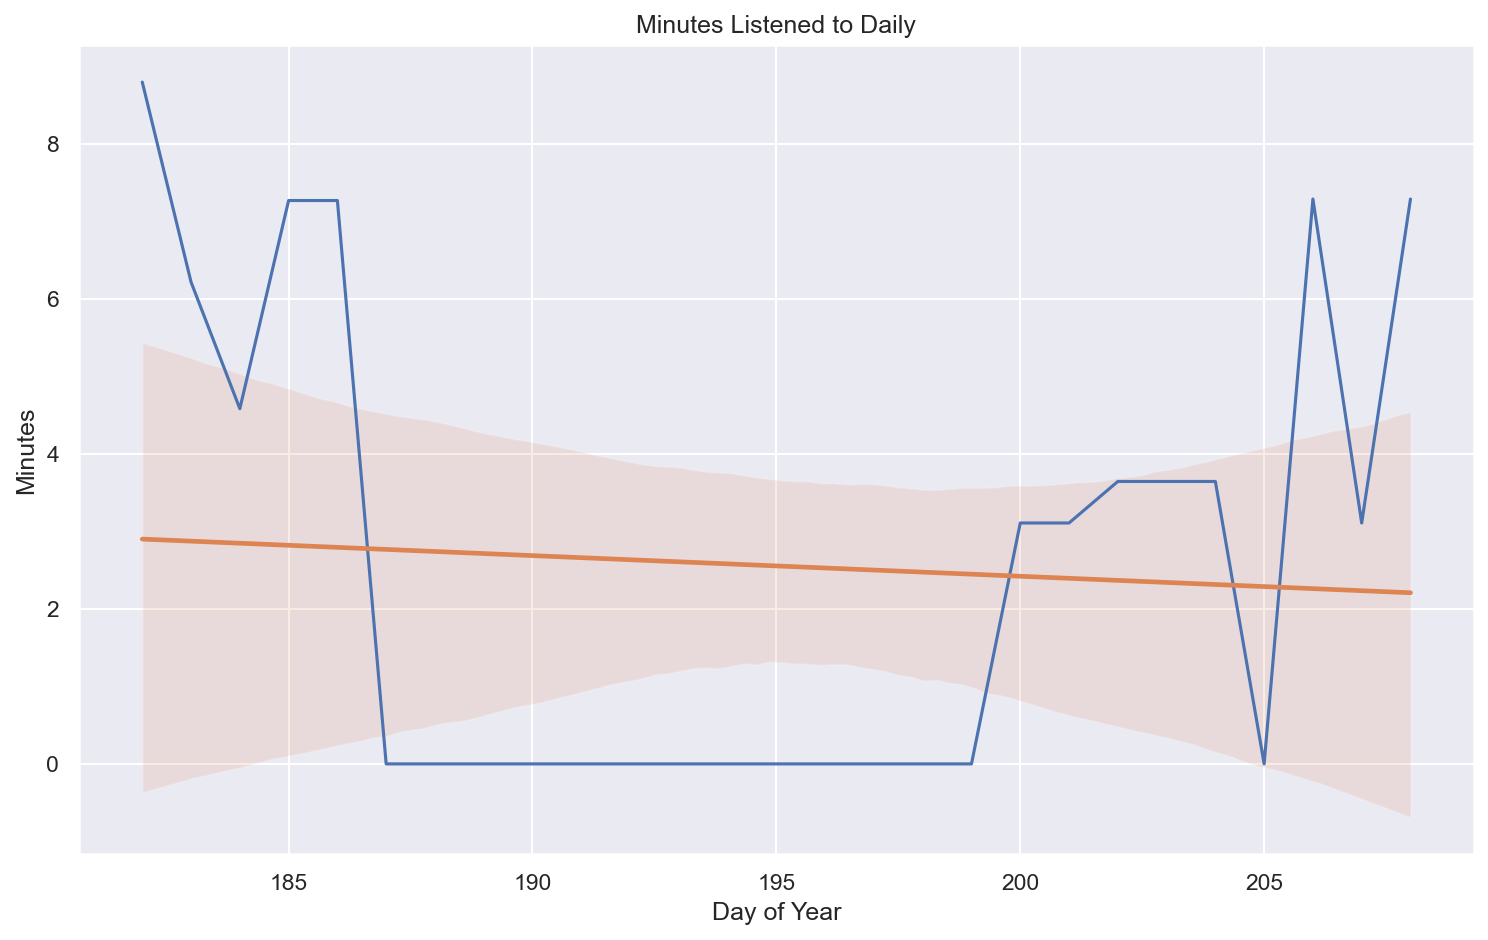

In [11]:
# Overall duration listened to per day and the trend, for a specific time frame
freq = "D"
begin = "2022-07-01"  # Earliest date to be considered
end = "2022-07-30"  # Latest date to be considered

daily_played = (
    played[["time", "duration"]].set_index("time").groupby(pd.Grouper(freq=freq)).sum()
)
daily_played["duration"] = (
    daily_played["duration"] / 60000
)  # minutes instead of milliseconds
# filter for only the year
daily_played = daily_played[
    (daily_played.index >= pd.to_datetime(begin))
    & (daily_played.index <= pd.to_datetime(end))
]
daily_played.index = daily_played.index.map(lambda x: int(x.strftime("%j")))

sns.set(rc={"figure.figsize": (12, 7)})
sns.set(rc={"figure.dpi": 150})
chart = sns.lineplot(data=daily_played, x=daily_played.index, y="duration")
reg = sns.regplot(data=daily_played, x=daily_played.index, y="duration", scatter=False)
chart.set(title="Minutes Listened to Daily", ylabel="Minutes", xlabel="Day of Year")

plt.show()